In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn as imblearn
import warnings
warnings.filterwarnings('ignore')

In [140]:
train_data=pd.read_csv("G:\\Shraddha\\BABI\\Project\\NewData\\clean_data.csv");

In [141]:
test_data=pd.read_csv("G:\\Shraddha\\BABI\\Project\\NewData\\validation_data.csv");

In [77]:
train_data.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,loan_age,fico_value
0,0,7500.0,36,13.75%,255.43,E,E2,OWN,22000.0,Not Verified,...,1.0,7.0,0.0,4175.0,8.0,f,Individual,0.0,5109,662.0
1,1,3500.0,36,10.28%,113.39,C,C1,RENT,20000.0,Not Verified,...,0.0,17.0,0.0,1882.0,18.0,f,Individual,0.0,5108,682.0
2,2,5750.0,36,7.43%,178.69,A,A2,MORTGAGE,125000.0,Not Verified,...,0.0,10.0,0.0,2817.0,16.0,f,Individual,0.0,5108,792.0
3,3,5000.0,36,7.43%,155.38,A,A2,RENT,40000.0,Not Verified,...,0.0,4.0,0.0,2562.0,7.0,f,Individual,0.0,5108,772.0
4,4,1200.0,36,11.54%,39.60,C,C5,RENT,20000.0,Not Verified,...,0.0,3.0,0.0,1153.0,4.0,f,Individual,0.0,5108,662.0


In [142]:
#drop open_acc column since it has high correlation with total_acc 0.69%
train_data.drop(['open_acc'], axis=1,inplace=True)
test_data.drop(['open_acc'], axis=1,inplace=True)

In [143]:
train_data.drop(['Unnamed: 0'], axis=1,inplace=True)
test_data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [144]:
rows = train_data.shape[0] 
cols = train_data.shape[1] 

In [81]:
#remove home_ownership from test and train data
#train_data.drop(['home_ownership'], axis=1,inplace=True)
#test_data.drop(['home_ownership'], axis=1,inplace=True)

In [82]:
#remove home_ownership from test and train data
#train_data.drop(['application_type'], axis=1,inplace=True)
#test_data.drop(['application_type'], axis=1,inplace=True)

In [83]:

#remove home_ownership from test and train data
#train_data.drop(['initial_list_status'], axis=1,inplace=True)
#test_data.drop(['initial_list_status'], axis=1,inplace=True)

In [145]:
train_data.drop(['int_rate'], axis=1,inplace=True)
test_data.drop(['int_rate'], axis=1,inplace=True)

In [146]:
#try dropping sub grade column
train_data.drop(['sub_grade'], axis=1,inplace=True)
test_data.drop(['sub_grade'], axis=1,inplace=True)

In [159]:
train_data['loan_status'] = train_data['loan_status'].str.replace('Fully Paid','0')
train_data['loan_status'] = train_data['loan_status'].str.replace('Charged Off','1')
train_data['loan_status']=train_data['loan_status'].astype(int)

AttributeError: Can only use .str accessor with string values!

In [148]:
test_data['loan_status'] = test_data['loan_status'].str.replace('Fully Paid','0')
test_data['loan_status'] = test_data['loan_status'].str.replace('Charged Off','1')
test_data['loan_status']=test_data['loan_status'].astype(int)

In [88]:
address=pd.DataFrame(train_data['addr_state'].value_counts())

In [149]:

one_hot_train=pd.get_dummies(train_data, columns=["verification_status", "purpose","addr_state","application_type","initial_list_status","home_ownership","grade"], 
                             prefix=["verification_status.", "purpose.","addr_state.","application_type.","initial_list_status.","home_ownership.","grade."])

In [150]:

one_hot_test=pd.get_dummies(test_data, columns=["verification_status", "purpose","addr_state","application_type","initial_list_status","home_ownership","grade"], prefix=[
    "verification_status.", "purpose.","addr_state.","application_type.","initial_list_status.","home_ownership.","grade."])

In [151]:
one_hot_train['addr_state.west'] =sum([one_hot_train['addr_state._CA'],
                                       one_hot_train['addr_state._AZ'],
                                       one_hot_train['addr_state._WA'],
                                       one_hot_train['addr_state._CO'],
                                       one_hot_train['addr_state._NV'],
                                       one_hot_train['addr_state._OR'],
                                       one_hot_train['addr_state._UT'],
                                       one_hot_train['addr_state._NM'],
                                       one_hot_train['addr_state._HI'],
                                       one_hot_train['addr_state._FL'],
                                       one_hot_train['addr_state._AK'],
                                       one_hot_train['addr_state._WY'],
                                       one_hot_train['addr_state._ID']
                                     ])
one_hot_train['addr_state.Mid_West'] =sum([one_hot_train['addr_state._IL'],
                                            one_hot_train['addr_state._OH'],
                                            one_hot_train['addr_state._MI'],
                                            one_hot_train['addr_state._MN'],
                                            one_hot_train['addr_state._MO'],
                                            one_hot_train['addr_state._IN'],
                                            one_hot_train['addr_state._WI'],
                                            one_hot_train['addr_state._KS'],
                                            one_hot_train['addr_state._SD'],
                                            one_hot_train['addr_state._NE'],
                                            one_hot_train['addr_state._ND'],
                                            one_hot_train['addr_state._IA']
                                    ])
one_hot_train['addr_state.North_East'] =sum([one_hot_train['addr_state._NY'],
                                            one_hot_train['addr_state._NJ'],
                                            one_hot_train['addr_state._PA'],
                                            one_hot_train['addr_state._MA'],
                                            one_hot_train['addr_state._CT'],
                                            one_hot_train['addr_state._NH'],
                                            one_hot_train['addr_state._RI'],
                                            one_hot_train['addr_state._DE'],
                                            one_hot_train['addr_state._DC'],
                                            one_hot_train['addr_state._VT'],
                                            one_hot_train['addr_state._ME']
                                               ])
one_hot_train['addr_state.South'] =sum([one_hot_train['addr_state._TX'],
                                            one_hot_train['addr_state._FL'],
                                            one_hot_train['addr_state._GA'],
                                            one_hot_train['addr_state._VA'],
                                            one_hot_train['addr_state._NC'],
                                            one_hot_train['addr_state._MD'],
                                            one_hot_train['addr_state._TN'],
                                            one_hot_train['addr_state._AL'],
                                            one_hot_train['addr_state._SC'],
                                            one_hot_train['addr_state._LA'],
                                            one_hot_train['addr_state._KY'],
                                            one_hot_train['addr_state._OK'],
                                            one_hot_train['addr_state._AR'],
                                            one_hot_train['addr_state._WV'],
                                            one_hot_train['addr_state._MS']  
                                            ])


In [152]:
one_hot_train.drop(['addr_state._AK','addr_state._AL','addr_state._AR','addr_state._AZ','addr_state._CO','addr_state._CT',
'addr_state._DC','addr_state._DE','addr_state._FL','addr_state._GA','addr_state._HI','addr_state._IA','addr_state._ID',
'addr_state._IL','addr_state._IN','addr_state._KS','addr_state._KY','addr_state._LA','addr_state._MA','addr_state._MD',
'addr_state._ME','addr_state._MI','addr_state._MN','addr_state._MO','addr_state._MS','addr_state._MT','addr_state._NC',
'addr_state._ND','addr_state._NE','addr_state._NH','addr_state._NJ','addr_state._NM','addr_state._NV','addr_state._NY',
'addr_state._OH','addr_state._OK','addr_state._OR','addr_state._PA','addr_state._RI','addr_state._SC','addr_state._SD',
'addr_state._TN','addr_state._TX','addr_state._UT','addr_state._VA','addr_state._VT','addr_state._WA','addr_state._WI',
'addr_state._WV','addr_state._WY','addr_state._CA'], axis=1,inplace=True)

In [153]:
one_hot_test['addr_state.west'] =sum([one_hot_test['addr_state._CA'],
                                       one_hot_test['addr_state._AZ'],
                                       one_hot_test['addr_state._WA'],
                                       one_hot_test['addr_state._CO'],
                                       one_hot_test['addr_state._NV'],
                                       one_hot_test['addr_state._OR'],
                                       one_hot_test['addr_state._UT'],
                                       one_hot_test['addr_state._NM'],
                                       one_hot_test['addr_state._HI'],
                                       one_hot_test['addr_state._FL'],
                                       one_hot_test['addr_state._AK'],
                                       one_hot_test['addr_state._WY'],
                                       one_hot_test['addr_state._ID']
                                     ])
one_hot_test['addr_state.Mid_West'] =sum([one_hot_test['addr_state._IL'],
                                            one_hot_test['addr_state._OH'],
                                            one_hot_test['addr_state._MI'],
                                            one_hot_test['addr_state._MN'],
                                            one_hot_test['addr_state._MO'],
                                            one_hot_test['addr_state._IN'],
                                            one_hot_test['addr_state._WI'],
                                            one_hot_test['addr_state._KS'],
                                            one_hot_test['addr_state._SD'],
                                            one_hot_test['addr_state._NE'],
                                            one_hot_test['addr_state._ND']
                                           # one_hot_test['addr_state._IA']
                                    ])
one_hot_test['addr_state.North_East'] =sum([one_hot_test['addr_state._NY'],
                                            one_hot_test['addr_state._NJ'],
                                            one_hot_test['addr_state._PA'],
                                            one_hot_test['addr_state._MA'],
                                            one_hot_test['addr_state._CT'],
                                            one_hot_test['addr_state._NH'],
                                            one_hot_test['addr_state._RI'],
                                            one_hot_test['addr_state._DE'],
                                            one_hot_test['addr_state._DC'],
                                            one_hot_test['addr_state._VT'],
                                            one_hot_test['addr_state._ME']
                                               ])
one_hot_test['addr_state.South'] =sum([one_hot_test['addr_state._TX'],
                                            one_hot_test['addr_state._FL'],
                                            one_hot_test['addr_state._GA'],
                                            one_hot_test['addr_state._VA'],
                                            one_hot_test['addr_state._NC'],
                                            one_hot_test['addr_state._MD'],
                                            one_hot_test['addr_state._TN'],
                                            one_hot_test['addr_state._AL'],
                                            one_hot_test['addr_state._SC'],
                                            one_hot_test['addr_state._LA'],
                                            one_hot_test['addr_state._KY'],
                                            one_hot_test['addr_state._OK'],
                                            one_hot_test['addr_state._AR'],
                                            one_hot_test['addr_state._WV'],
                                            one_hot_test['addr_state._MS']  
                                            ])


In [154]:
one_hot_test.drop(['addr_state._AK','addr_state._AL','addr_state._AR','addr_state._AZ','addr_state._CO','addr_state._CT',
'addr_state._DC','addr_state._DE','addr_state._FL','addr_state._GA','addr_state._HI','addr_state._ID',
'addr_state._IL','addr_state._IN','addr_state._KS','addr_state._KY','addr_state._LA','addr_state._MA',
'addr_state._MD','addr_state._ME','addr_state._MI','addr_state._MN','addr_state._MO','addr_state._MS',
'addr_state._MT','addr_state._NC','addr_state._ND','addr_state._NE','addr_state._NH','addr_state._NJ',
'addr_state._NM','addr_state._NV','addr_state._NY','addr_state._OH','addr_state._OK','addr_state._OR',
'addr_state._PA','addr_state._RI','addr_state._SC','addr_state._SD','addr_state._TN','addr_state._TX',
'addr_state._UT','addr_state._VA','addr_state._VT','addr_state._WA','addr_state._WI','addr_state._WV',
'addr_state._WY','addr_state._CA'], axis=1,inplace=True)

In [95]:
one_hot_test.shape

(791870, 50)

In [160]:
x_train=one_hot_train.drop(['loan_status'],axis=1) 
y_train=one_hot_train.loan_status

In [156]:
x_test=one_hot_test.drop(['loan_status'],axis=1) 
y_test=one_hot_test.loan_status

In [98]:
#compare train and test column names
a = np.intersect1d(x_train.columns, x_test.columns)
#print (a)
b=x_train.columns
#print(b)
c=np.array(b)
#type(c)
print(np.setdiff1d(c,a))

['home_ownership._OTHER']


In [99]:
#it seems home_ownership._OTHER column is missing into test data so create it
x_test['home_ownership._OTHER']=0

In [100]:
x_train.dtypes

loan_amnt                               float64
term                                      int64
installment                             float64
annual_inc                              float64
dti                                     float64
delinq_2yrs                             float64
pub_rec                                 float64
revol_bal                               float64
total_acc                               float64
mort_acc                                float64
loan_age                                  int64
fico_value                              float64
verification_status._Not Verified         uint8
verification_status._Source Verified      uint8
verification_status._Verified             uint8
purpose._car                              uint8
purpose._credit_card                      uint8
purpose._debt_consolidation               uint8
purpose._educational                      uint8
purpose._home_improvement                 uint8
purpose._house                          

In [101]:
#get feature importance
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=18)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, random_state=15)

In [102]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [103]:
pd.set_option('display.max_rows', feature_importances.shape[0]+1)
print(feature_importances)

                                      importance
grade._A                                0.113877
revol_bal                               0.107341
dti                                     0.107262
grade._B                                0.094051
annual_inc                              0.084155
installment                             0.075784
total_acc                               0.064041
loan_age                                0.062932
fico_value                              0.047098
grade._C                                0.038767
loan_amnt                               0.033492
mort_acc                                0.024769
term                                    0.020012
delinq_2yrs                             0.012172
pub_rec                                 0.008938
home_ownership._RENT                    0.008678
addr_state.South                        0.007320
addr_state.west                         0.007303
verification_status._Verified           0.007027
grade._D            

In [104]:
#Import estimator object
from sklearn.linear_model import LogisticRegression

#create instance of estimator
#logreg=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 #                  intercept_scaling=1, l1_ratio=None, max_iter=1000,
  #                 multi_class='auto', n_jobs=None, penalty='l2',
   #                random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
    #               warm_start=False)
logreg=LogisticRegression( max_iter=1000)
#use traing data to train estimator
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [105]:
pred_test=logreg.predict(x_test)

In [106]:
pd.crosstab(y_test,pred_test)

col_0,0,1
loan_status,,
0,636354,5516
1,144415,5585


In [107]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [108]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, pred_test )
print(confusion)

[[636354   5516]
 [144415   5585]]


In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
sensitivity=TP / float(TP+FN)
specificity=TN / float(TN+FP)
print('Accuracy='+ str(accuracy)) 
print('sensitivity='+str(sensitivity))
print('specificity='+str(specificity))

Accuracy=0.8106621036281207
sensitivity=0.037233333333333334
specificity=0.9914063595432097


In [162]:
#check class imbalance 
y_train.value_counts()/rows
#class 0 (Fully Paid) as 82.12% and 1 (Charged off) has 17.87%

0    0.821211
1    0.178789
Name: loan_status, dtype: float64

In [163]:

# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [165]:
smote_count=x_smote.shape[0] 

In [166]:
y_smote.value_counts()/smote_count

1    0.5
0    0.5
Name: loan_status, dtype: float64

In [112]:
logreg.fit(x_smote,y_smote)

LogisticRegression(max_iter=1000)

In [113]:
pred_test=logreg.predict(x_test)

In [114]:
pd.crosstab(y_test,pred_test)

col_0,0,1
loan_status,,
0,434717,207153
1,62689,87311


In [115]:
#from sklearn.metrics import confusion_matrix
#from sklearn import metrics

In [116]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test,pred_test )
print(confusion)

[[434717 207153]
 [ 62689  87311]]


In [117]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
sensitivity=TP / float(TP+FN)
specificity=TN / float(TN+FP)
print('Accuracy='+ str(accuracy)) 
print('sensitivity='+str(sensitivity))
print('specificity='+str(specificity))

Accuracy=0.6592344703044691
sensitivity=0.5820733333333333
specificity=0.6772664246654307


In [119]:
logreg.coef_

array([[-2.05735230e-04,  8.21791470e-02,  6.75519587e-03,
        -3.33121075e-07,  3.71345303e-02,  1.26404741e-03,
         1.51798385e-03, -5.98789896e-06, -8.95004513e-03,
        -9.30062809e-03, -1.02786707e-04, -5.18803888e-03,
        -6.65203743e-03, -5.48849183e-03, -4.62794082e-03,
        -2.78946234e-04, -5.74509155e-03, -5.41812366e-03,
        -7.10850493e-06, -1.48996700e-03, -1.01081473e-04,
        -5.03140620e-04, -2.19631263e-04, -1.25612892e-04,
        -1.01812159e-03, -1.33250003e-05, -1.86452857e-04,
        -1.24936174e-04, -7.43901665e-05,  4.16261987e-04,
        -1.69687356e-05, -5.98622217e-03, -6.71415118e-03,
        -1.73348233e-07, -8.91376000e-03, -1.40729954e-06,
        -3.77321728e-06, -2.42279223e-03, -3.76182209e-03,
        -5.42501102e-03, -7.58179239e-03, -4.84957666e-03,
        -2.19618226e-03, -9.37382681e-04, -3.14230253e-04,
        -7.44229169e-05, -6.09991514e-03, -4.23415127e-03,
        -4.39379200e-03, -6.12680064e-03]])

In [120]:
pred1=logreg.predict_proba(x_test)# to get probabilities instead of classes

(-0.05, 1.05)

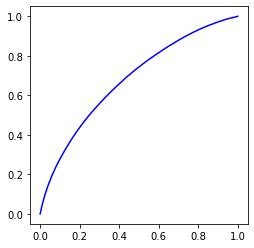

In [121]:
#ROC Curv
fpr, tpr, threshold= metrics.roc_curve(y_test, pred1[:,1]) #pass the actual test DV and 
#predicted probability (only P(y)=1)
#**********DRAW ROC CURVE**************
plt.plot(fpr, tpr, label='ROC curve', color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

In [122]:
AUC= metrics.auc(fpr,tpr) # to get the area under the Curve
print (AUC) #69.03% which is good. this means model is covering 69.03% of the datapoints well. Best value is 1
#worst is 0

0.6802528468069858


In [136]:
#test for changing cut off
x=[]
for i in range(len(pred1[:,1])):
    if (pred1[:,1][i]>=0.48):
        x.append(1)
    else:
        x.append(0)
x=np.array(x)
pd.crosstab(y_test,x)

col_0,0,1
loan_status,,
0,403942,237928
1,55506,94494


In [137]:
confusion = metrics.confusion_matrix(y_test,x )
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[403942 237928]
 [ 55506  94494]]


In [138]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
sensitivity=TP / float(TP+FN)
specificity=TN / float(TN+FP)
print('Accuracy='+ str(accuracy)) 
print('sensitivity='+str(sensitivity))
print('specificity='+str(specificity))

Accuracy=0.6294417012893531
sensitivity=0.62996
specificity=0.6293205789334289


In [126]:
#save model
import pickle
Pkl_Filename = "G:\\Shraddha\\BABI\\Project\\NewData\\Pickle_LR_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logreg, file)